In [1]:
import pandas as pd
import Technic as tc
from Technic import TSFM

In [2]:
# pip freeze > requirements.txt

## Internal Data Loader

In [3]:
df_internal_raw = pd.read_excel('fake_internal.xlsx')
df_internal_raw.head()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
0,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600
1,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520
2,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023
3,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759
4,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131


In [4]:
ID_config = {
    'in_sample_start':"2018-01-31",
    'in_sample_end':"2022-12-31",
    'full_sample_end':"2023-11-30",
    'scen_p0':"2022-12-31",
}
IDLoader = tc.PPNRInternalLoader(**ID_config)
IDLoader.load(df_internal_raw, date_col='Date')

In [5]:
IDLoader.internal_data.tail()

,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
Date,,,,,,
2023-07-31,2489.052561,0.033147,2518.590119,0.053016,2289.250500,0.035404
2023-08-31,2509.747182,0.046901,2582.117434,0.050611,2314.268164,0.011812
2023-09-30,2516.131131,0.050095,2612.826339,0.033226,2336.076344,0.024985
2023-10-31,2532.723351,0.051663,2649.181996,0.039805,2352.850746,0.035034
2023-11-30,2556.873350,0.051585,2683.722013,0.026095,2374.657724,0.030125


## Mev Loader

In [6]:
mev_load = {
    'model_mev_source': {'fake_scens.xlsx': 'base'},
    'scen_mevs_source': {
        'fake_scens.xlsx': {'base':'base', 'adv':'adv', 'sev':'sev'}
    } 
}
mev_ldr = tc.MEVLoader()
mev_ldr.load(
    source='fake_scens.xlsx',
    sheet='base'
)

mev_ldr.load_scens(
    source='fake_scens.xlsx',
    scens={
        'Base': 'base',
        'Adv': 'adv',
        'Sev': 'sev'
    },
    set_name='EWST2024'
)

In [7]:
mev_ldr.model_mev_qtr

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [8]:
mev_ldr.model_mev_mth

""


In [9]:
mev_ldr.scen_mev_qtr['EWST2024']['Base']

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [10]:
mev_ldr.mev_map

{'NGDP': {'type': 'level', 'description': 'Nominal GDP'},
 'PSR': {'type': 'rate', 'description': 'Personal Savings Rate'},
 'PDI': {'type': 'level', 'description': 'Personal Disposable Income'},
 'UNRATE': {'type': 'rate', 'description': 'Unemployment Rate'},
 'CPI': {'type': 'rate', 'description': 'Consumer Price Index'}}

## Data Manager

In [11]:
dm_config = {
    'internal_loader': IDLoader,
    'mev_loader': mev_ldr,
}
dm = tc.DataManager(**dm_config)

In [12]:
dm.internal_in.head()

,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
Date,,,,,,
2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600
2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520
2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023
2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759
2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131


In [13]:
dm.model_mev

nan,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,3,1
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059,4,2
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845,5,2
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000,6,2
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583,7,3
...,...,...,...,...,...,...,...
2030-08-31,104.723199,10583.356792,8335.923233,5.871737,3.600410,8,3
2030-09-30,104.760000,10546.660000,8319.090000,6.610000,3.770000,9,3
2030-10-31,104.821508,10508.335975,8302.079944,7.095223,4.235333,10,4
2030-11-30,104.905647,10482.105303,8289.926172,7.143834,4.837014,11,4


In [14]:
dm.scen_mevs['EWST2024']['Base']

nan,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,3,1
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059,4,2
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845,5,2
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000,6,2
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583,7,3
...,...,...,...,...,...,...,...
2030-08-31,104.723199,10583.356792,8335.923233,5.871737,3.600410,8,3
2030-09-30,104.760000,10546.660000,8319.090000,6.610000,3.770000,9,3
2030-10-31,104.821508,10508.335975,8302.079944,7.095223,4.235333,10,4
2030-11-30,104.905647,10482.105303,8289.926172,7.143834,4.837014,11,4


In [15]:
# Build Search Vars
var_lst = ['VR_price', 'NGDP', 'PDI']
df_dict = dm.build_search_vars(var_lst)
df_dict


e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


{'VR_price':             VR_price
 Date                
 2018-01-31  0.045600
 2018-02-28  0.023520
 2018-03-31  0.025023
 2018-04-30  0.013759
 2018-05-31  0.033131
 ...              ...
 2023-07-31  0.035404
 2023-08-31  0.011812
 2023-09-30  0.024985
 2023-10-31  0.035034
 2023-11-30  0.030125
 
 [71 rows x 1 columns],
 'NGDP':                NGDP_LV   NGDP_GR
 2000-03-31  100.160000       NaN
 2000-04-30   99.896506 -0.002631
 2000-05-31   99.768751 -0.001279
 2000-06-30   99.740000 -0.000288
 2000-07-31   99.761353  0.000214
 ...                ...       ...
 2030-08-31  104.723199  0.000158
 2030-09-30  104.760000  0.000351
 2030-10-31  104.821508  0.000587
 2030-11-30  104.905647  0.000803
 2030-12-31  105.020000  0.001090
 
 [370 rows x 2 columns],
 'PDI':                  PDI_LV    PDI_GR
 2000-03-31  8047.460000       NaN
 2000-04-30  8036.334431 -0.001382
 2000-05-31  8037.305959  0.000121
 2000-06-30  8044.020000  0.000835
 2000-07-31  8050.351074  0.000787
 ...            

In [16]:
dm.model_mev['NGDP']

2000-03-31    100.160000
2000-04-30     99.896506
2000-05-31     99.768751
2000-06-30     99.740000
2000-07-31     99.761353
                 ...    
2030-08-31    104.723199
2030-09-30    104.760000
2030-10-31    104.821508
2030-11-30    104.905647
2030-12-31    105.020000
Freq: M, Name: NGDP, Length: 370, dtype: float64

In [17]:
# Apply to MEVs
def new_features(df_mev, df_in):
    df_mev['NGDP-Price'] =  df_mev['NGDP'] - df_in['VR_price']
    df_mev['PDI-FixBal'] =  df_mev['PDI'] - df_in['Fixed_balance']

    return df_mev

dm.apply_to_mevs(new_features)

In [18]:
dm.model_mev.dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal,M,Q
2018-03-31,103.050000,10317.070000,8191.440000,6.980000,6.980000,103.024977,6624.972021,3,1
2018-04-30,103.012962,10338.592901,8202.088796,6.546695,8.690724,102.988629,6637.448898,4,2
2018-05-31,102.952276,10345.066305,8208.387253,5.216383,9.773928,102.935172,6627.744743,5,2
2018-06-30,102.900000,10334.120000,8203.050000,4.010000,9.410000,102.888562,6603.557589,6,2
2018-07-31,102.879773,10307.247252,8182.171746,3.570359,7.225242,102.867119,6570.662956,7,3
...,...,...,...,...,...,...,...,...,...
2023-05-31,103.611704,10380.626784,8270.375531,7.148222,4.961486,103.613412,5800.570288,5,2
2023-06-30,103.670000,10350.680000,8276.220000,7.530000,3.460000,103.635366,5799.913008,6,2
2023-07-31,103.796679,10317.677642,8256.675701,7.512735,3.334155,103.677933,5786.058050,7,3
2023-08-31,103.900526,10301.156371,8224.351573,7.035848,4.198376,103.746987,5749.316534,8,3


In [19]:
dm._mev_loader.scen_mev_qtr['EWST2024']['Base'].dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal
2018-03-31,103.05,10317.07,8191.44,6.98,6.98,103.024977,6624.972021
2018-06-30,102.9,10334.12,8203.05,4.01,9.41,102.888562,6603.557589
2018-09-30,103.01,10286.28,8140.69,3.82,3.24,102.988538,6511.561298
2018-12-31,103.29,10407.63,8172.07,3.82,7.88,103.278506,6486.633955
2019-03-31,102.64,10292.98,8183.28,7.07,5.08,102.624918,6465.643601
2019-06-30,103.14,10290.67,8202.36,6.33,9.47,103.121367,6434.72285
2019-09-30,103.2,10293.29,8167.06,5.62,9.8,103.187933,6343.36992
2019-12-31,103.44,10280.36,8190.01,4.79,9.61,103.404503,6331.272684
2020-03-31,102.85,10297.25,8196.02,7.39,6.32,102.819348,6298.627059
2020-06-30,103.74,10257.56,8176.43,4.96,9.03,103.719167,6245.55097


In [20]:
dm.scen_mevs['EWST2024']['Sev'].dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal,M,Q
2018-03-31,123.660000,9285.360000,9829.730000,6.280000,8.370000,123.634977,8263.262021,3,1
2018-04-30,123.616117,9304.728982,9842.503131,5.890569,10.421839,123.590073,8281.200316,4,2
2018-05-31,123.543272,9310.552874,9850.056366,4.694500,11.723791,123.525018,8271.656664,5,2
2018-06-30,123.480000,9300.700000,9843.650000,3.610000,11.290000,123.468562,8244.157589,6,2
2018-07-31,123.454785,9276.515271,9818.599078,3.215196,8.670407,123.442598,8206.178837,7,3
...,...,...,...,...,...,...,...,...,...
2023-05-31,124.336333,9342.568710,9924.457890,6.436403,5.955254,124.344000,7453.131981,5,2
2023-06-30,124.410000,9315.620000,9931.470000,6.780000,4.150000,124.375366,7455.163008,6,2
2023-07-31,124.564109,9285.917379,9908.013791,6.763720,3.997851,124.429880,7441.346820,7,3
2023-08-31,124.688705,9271.045085,9869.221516,6.333844,5.035452,124.512610,7399.942160,8,3


In [21]:
# Apply to Internal
print(dm.internal_data.head(3))
def new_features(df_in):
    df_in['VR_Bal-Price'] =  df_in['VR_balance'] - df_in['VR_price']
    df_in['Fixed_Bal-Price'] =  df_in['Fixed_balance'] - df_in['Fixed_price']

    return df_in

dm.apply_to_internal(new_features)
print(dm.internal_data.head(3))


            Fixed_balance  Fixed_price  Redeemable_balance  Redeemable_price  \
Date                                                                           
2018-01-31    1525.766256     0.054260          808.925168          0.018648   
2018-02-28    1540.515474     0.046348          835.771506          0.034777   
2018-03-31    1566.467979     0.026517          863.370334          0.017302   

             VR_balance  VR_price  
Date                               
2018-01-31  1022.483571  0.045600  
2018-02-28  1041.792249  0.023520  
2018-03-31  1065.030692  0.025023  
            Fixed_balance  Fixed_price  Redeemable_balance  Redeemable_price  \
Date                                                                           
2018-01-31    1525.766256     0.054260          808.925168          0.018648   
2018-02-28    1540.515474     0.046348          835.771506          0.034777   
2018-03-31    1566.467979     0.026517          863.370334          0.017302   

             VR_ba

## Model Building

### CM

In [22]:
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}
cm1 = tc.CM(**cm_config)

In [23]:
m_dum = tc.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, 'NGDP']
cm1.build(indep_vars)

In [24]:
cm1.model_in.testset.all_test_results

{'Fit Measures': R²        0.675494
 Adj R²    0.651893
 Name: Fit Measures, dtype: float64,
 'IS Error Measures': ME      505.298599
 MAE     139.733768
 RMSE    183.680547
 Name: IS Error Measures, dtype: float64,
 'OOS Error Measures': ME      778.116552
 MAE     340.389160
 RMSE    387.209325
 Name: OOS Error Measures, dtype: float64,
 'In-Sample R²': R²    0.675494
 Name: In-Sample R², dtype: float64,
 'Common Driver Significance':            P-value  Passed
 NGDP  1.263668e-13    True,
 "Group Driver F-Test M:2'3'4":               F-statistic  P-value  Passed
 Joint F Test     2.447408   0.0734    True,
 'Multicollinearity':                VIF
 Variable          
 NGDP      1.331018
 M:2       1.122161
 M:3       1.200633
 M:4       1.135271,
 'Residual Stationarity':        Statistic   P-value  Passed
 Test                              
 ADF    -1.560728  0.503285   False
 PP     -1.973907  0.298130   False
 KPSS    0.694610  0.014035   False
 ZA           NaN       NaN   False


=== In-Sample Performance ===
      r2   adj_r2         me        mae       rmse
0.675494 0.651893 505.298599 139.733768 183.680547

=== Model Parameters ===
Variable        Coef Pvalue       VIF        Std
   const -98454.2082  0.000 146086.51 10219.7241
    NGDP    967.6365  0.000      1.33    99.0149
     M:2    193.5453  0.041      1.12    92.5730
     M:3    309.5975  0.015      1.20   123.1140
     M:4    250.1751  0.021      1.14   104.9338


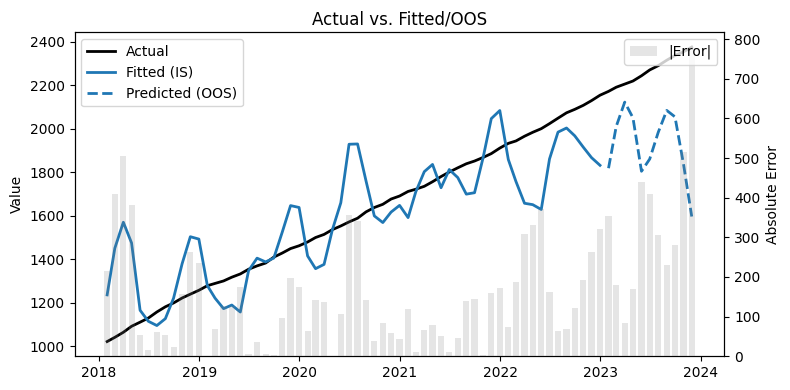


=== Model Testing ===
--- Fit Measures ---
R²        0.675494
Adj R²    0.651893

--- IS Error Measures ---
ME      505.298599
MAE     139.733768
RMSE    183.680547

--- OOS Error Measures ---
ME      778.116552
MAE     340.389160
RMSE    387.209325

--- In-Sample R² ---
R²    0.675494

--- Common Driver Significance ---
           P-value  Passed
NGDP  1.263668e-13    True

--- Group Driver F-Test M:2'3'4 ---
              F-statistic  P-value  Passed
Joint F Test     2.447408   0.0734    True

--- Multicollinearity ---
               VIF
Variable          
NGDP      1.331018
M:2       1.122161
M:3       1.200633
M:4       1.135271

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF    -1.560728  0.503285   False
PP     -1.973907  0.298130   False
KPSS    0.694610  0.014035   False
ZA           NaN       NaN   False
DFGLS  -0.291047  0.585190   False
RUR     1.678293  0.900000    True

--- Residual Normality ---
      Statistic   P

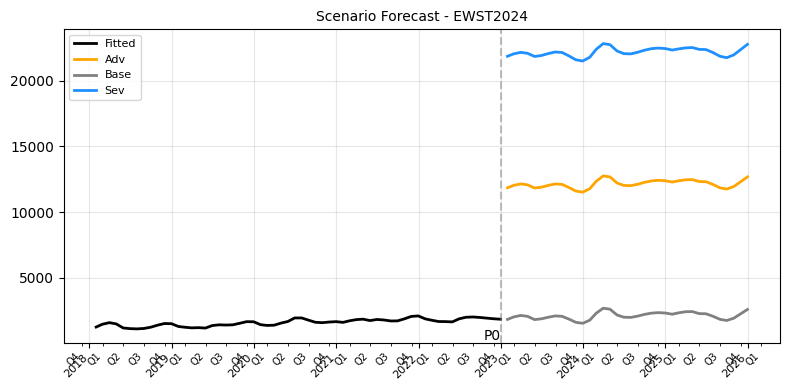

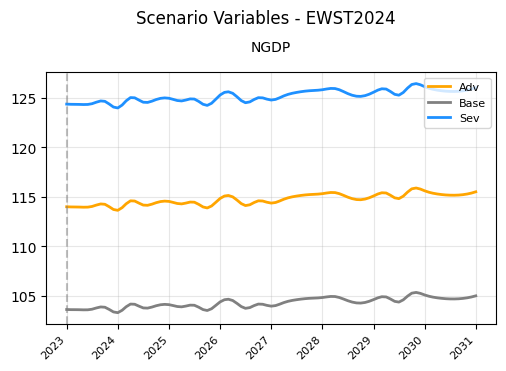

In [25]:
cm1.show_report(show_tests=True, show_scens=True)

In [26]:
cm_config = {
    'model_id': 'cm2',
    'target': 'VR_balance',
    'model_cls': tc.OLS
}
cm2 = tc.CM(**cm_config)

m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP', 'CPI', 'PSR']
cm2.build(indep_vars, data_manager=dm)#, outlier_idx=['2018-04-30', '2018-05-31'])

=== In-Sample Performance ===
      r2   adj_r2         me        mae       rmse
0.756048 0.680152 491.191616 120.103691 159.259015

=== Model Parameters ===
Variable        Coef Pvalue       VIF        Std
   const -1.0507e+05  0.000 206754.13 10361.5239
    NGDP    934.1116  0.000      1.54    99.9171
     CPI    -24.1326  0.070      1.44    12.9989
     PSR      0.9913  0.122      1.46     0.6298
     M:2    185.9076  0.009      1.87    68.4738
     M:3    306.4770  0.006      1.93   106.2067
     M:4    251.4697  0.013      1.88    97.1304
     M:5     93.7870  0.223      1.84    75.9270
     M:6    -22.8894  0.772      1.88    78.4695
     M:7    -16.7711  0.817      1.90    72.1364
     M:8     55.6024  0.393      1.89    64.4613
     M:9     88.7517  0.259      1.89    77.6270
    M:10     22.7783  0.809      1.91    93.7110
    M:11    -59.9413  0.578      1.95   106.8578
    M:12    -57.5663  0.580      1.96   103.3827


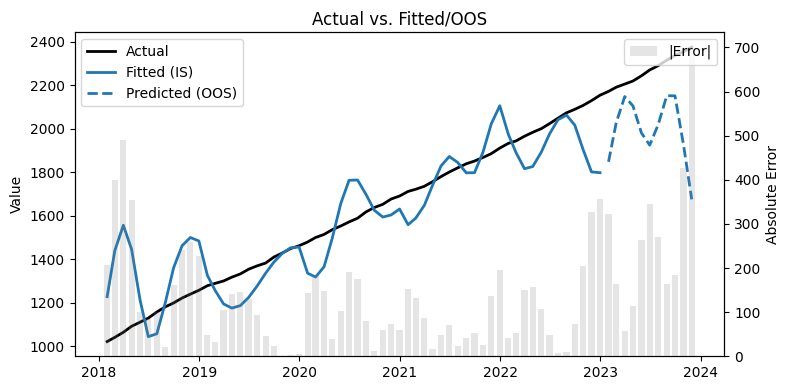


=== Model Testing ===
--- Fit Measures ---
R²        0.756048
Adj R²    0.680152

--- IS Error Measures ---
ME      491.191616
MAE     120.103691
RMSE    159.259015

--- OOS Error Measures ---
ME      699.212192
MAE     273.689748
RMSE    322.041926

--- In-Sample R² ---
R²    0.756048

--- Common Driver Significance ---
           P-value  Passed
NGDP  4.103667e-12    True
CPI   6.993462e-02    True
PSR   1.224739e-01   False

--- Group Driver F-Test M:2'3'4'5'6'7'8'9'10'11'12 ---
              F-statistic   P-value  Passed
Joint F Test     1.440191  0.188699   False

--- Multicollinearity ---
               VIF
Variable          
NGDP      1.542173
CPI       1.440777
PSR       1.459822
M:2       1.871108
M:3       1.925713
M:4       1.877397
M:5       1.839475
M:6       1.879077
M:7       1.902446
M:8       1.892991
M:9       1.887199
M:10      1.908031
M:11      1.953553
M:12      1.956246

--- Residual Stationarity ---
       Statistic       P-value  Passed
Test                   

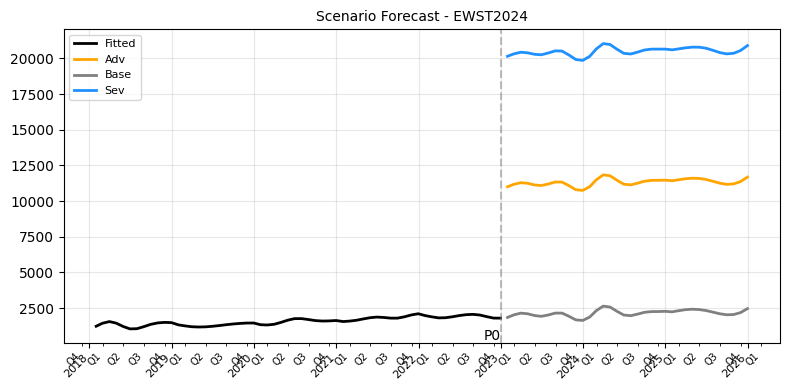

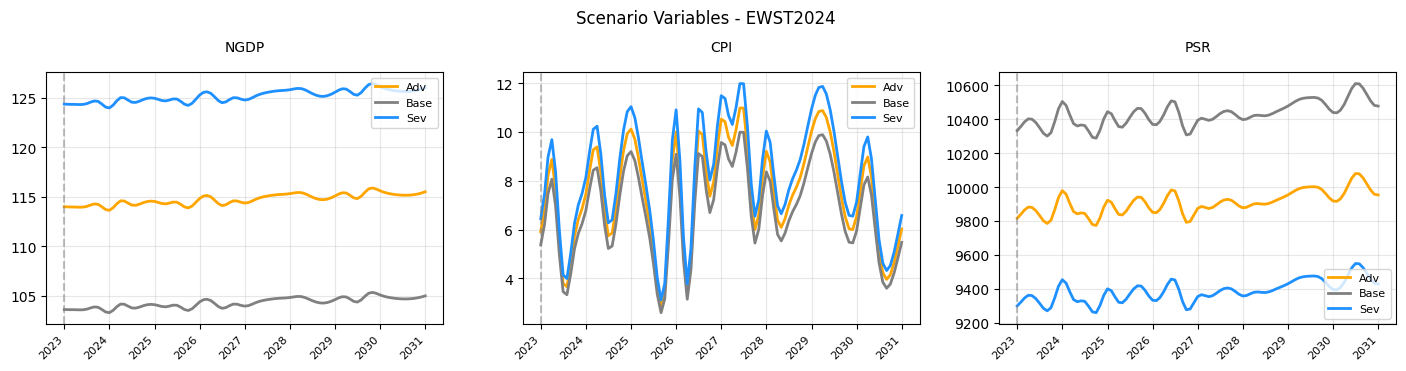

In [27]:
cm2.show_report(show_tests=True, show_scens=True)

### Segment

In [28]:
seg_config = {
    'segment_id': 'VR',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}

seg1 = tc.Segment(**seg_config)

In [29]:
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
tsfm_specs_map = dm.build_tsfm_specs(vars_list, max_lag=1, max_periods=2)

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


In [30]:
tsfm_specs_map

{'VR_price': ['VR_price'],
 'Fixed_price': ['Fixed_price'],
 'NGDP': [TSFM:NGDP_LV,
  TSFM:NGDP_LV_L1,
  TSFM:NGDP_GR,
  TSFM:NGDP_GR_L1,
  TSFM:NGDP_GR2,
  TSFM:NGDP_GR2_L1],
 'CPI': [TSFM:CPI_LV,
  TSFM:CPI_LV_L1,
  TSFM:CPI_DF,
  TSFM:CPI_DF_L1,
  TSFM:CPI_DF2,
  TSFM:CPI_DF2_L1,
  TSFM:CPI_GR,
  TSFM:CPI_GR_L1,
  TSFM:CPI_GR2,
  TSFM:CPI_GR2_L1],
 'PSR': [TSFM:PSR_LV,
  TSFM:PSR_LV_L1,
  TSFM:PSR_DF,
  TSFM:PSR_DF_L1,
  TSFM:PSR_DF2,
  TSFM:PSR_DF2_L1,
  TSFM:PSR_GR,
  TSFM:PSR_GR_L1,
  TSFM:PSR_GR2,
  TSFM:PSR_GR2_L1],
 'PDI': [TSFM:PDI_LV,
  TSFM:PDI_LV_L1,
  TSFM:PDI_GR,
  TSFM:PDI_GR_L1,
  TSFM:PDI_GR2,
  TSFM:PDI_GR2_L1]}

In [31]:
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
tsfm_df_map = dm.build_search_vars(vars_list, max_lag=1, max_periods=2)
tsfm_df_map['PDI'] 

,PDI_LV,PDI_LV_L1,PDI_GR,PDI_GR_L1,PDI_GR2,PDI_GR2_L1
2000-03-31,8047.460000,NaN,NaN,NaN,NaN,NaN
2000-04-30,8036.334431,8047.460000,-0.001382,NaN,NaN,NaN
2000-05-31,8037.305959,8036.334431,0.000121,-0.001382,-0.001262,NaN
2000-06-30,8044.020000,8037.305959,0.000835,0.000121,0.000956,-0.001262
2000-07-31,8050.351074,8044.020000,0.000787,0.000835,0.001623,0.000956
...,...,...,...,...,...,...
2030-08-31,8335.923233,8349.590293,-0.001637,-0.000682,-0.002318,-0.000058
2030-09-30,8319.090000,8335.923233,-0.002019,-0.001637,-0.003653,-0.002318
2030-10-31,8302.079944,8319.090000,-0.002045,-0.002019,-0.004060,-0.003653
2030-11-30,8289.926172,8302.079944,-0.001464,-0.002045,-0.003506,-0.004060


e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


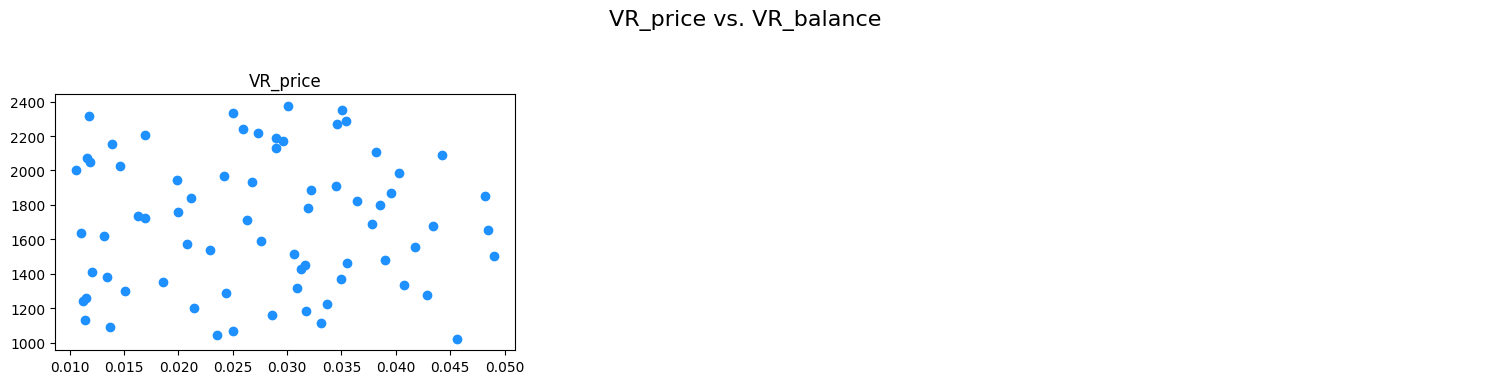

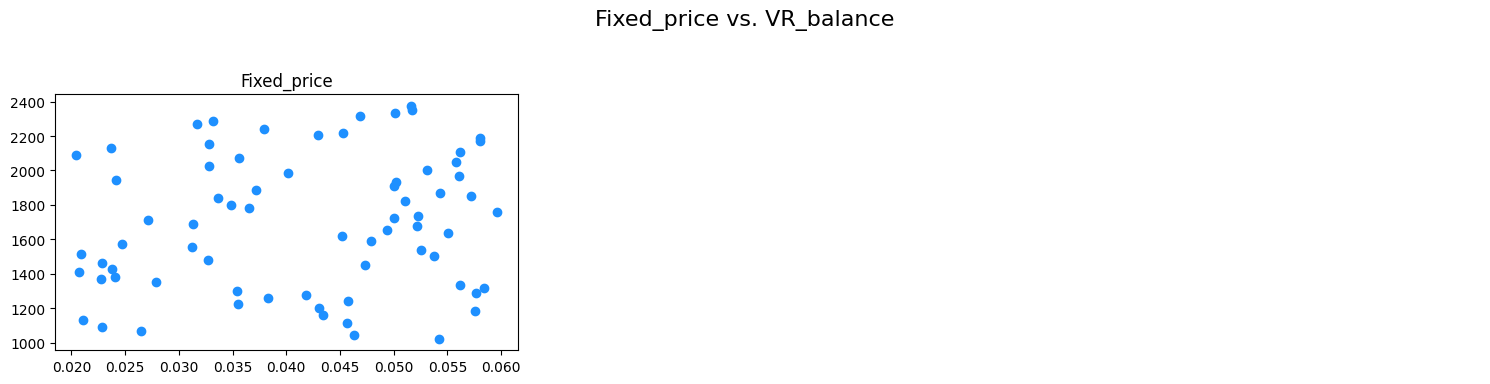

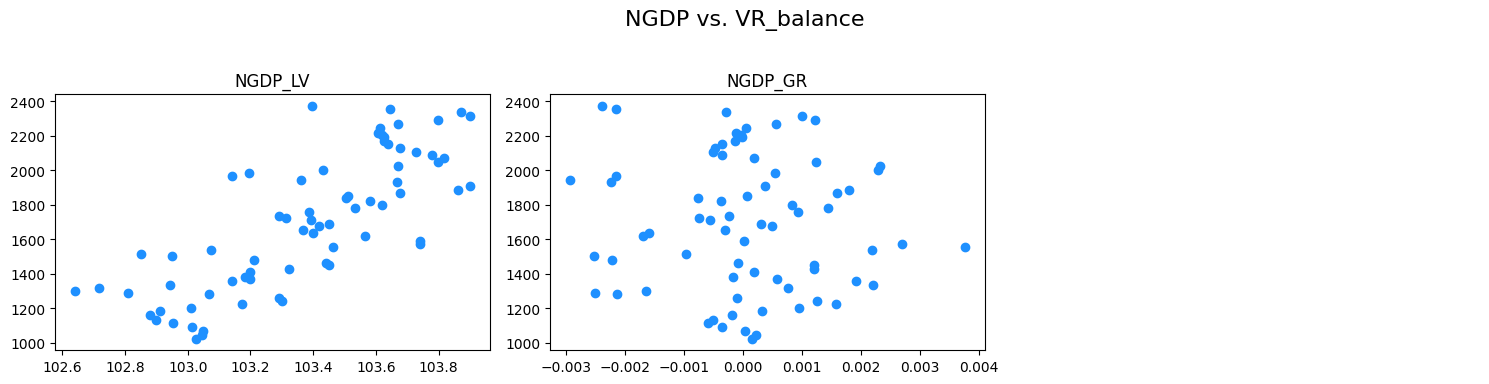

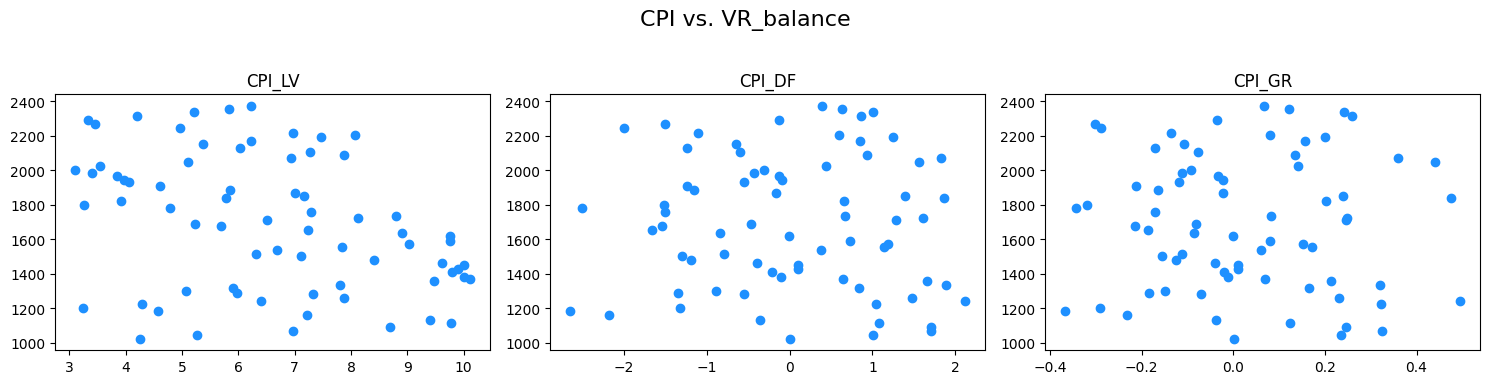

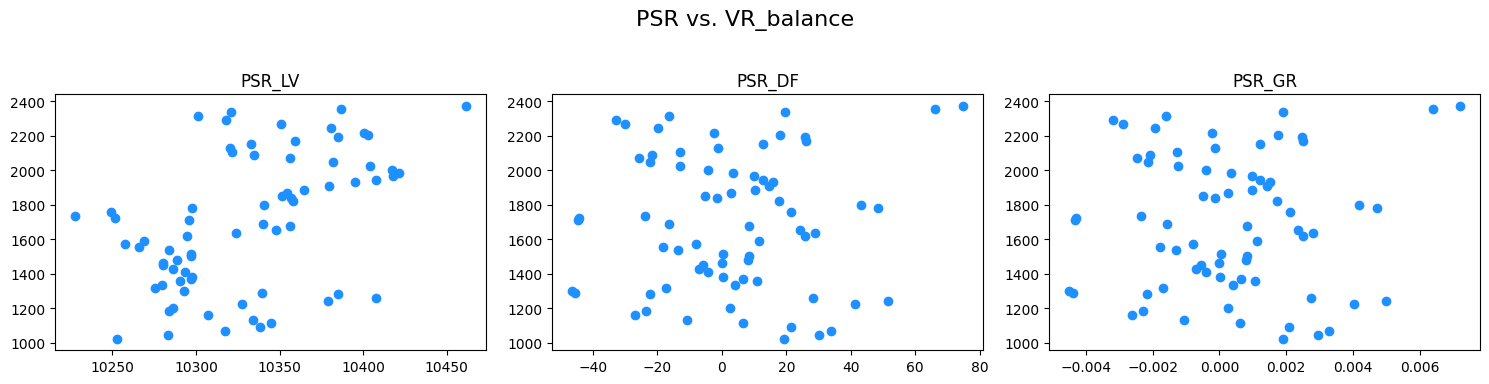

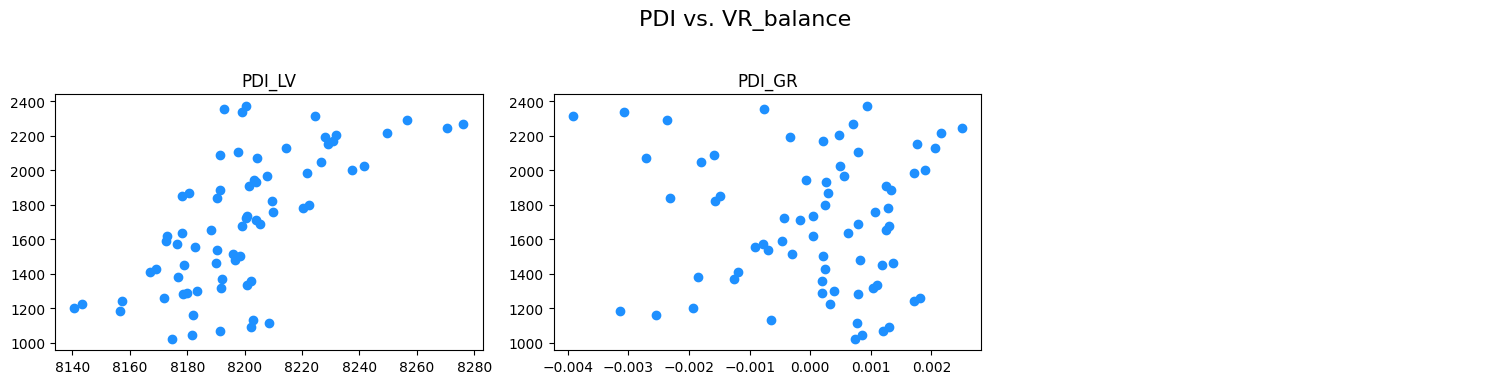

In [32]:
# Explore Vars
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
seg1.explore_vars(vars_list, plot_type='scatter')

In [33]:
forced_in = ['VR_price', tc.DumVar('M', categories=[2,3,4])]
desired_pool = [('PDI', 'PSR'), 'NGDP']#, 'UNRATE', 'CPI']
seg1.search_cms(desired_pool=desired_pool, forced_in=None)

=== ModelSearch Configuration ===
Target          : VR_balance
Model class     : OLS
Desired pool    : [('PDI', 'PSR'), 'NGDP']
Forced in       : []
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: None

Built 33 spec combinations.

--- Example TestSet Info ---
Active Tests:
- In-Sample R² | category: fit | filter_mode: moderate | desc: Require R² ≥ 0.4.
- Group Driver F-Test PDI'PSR | category: performance | filter_mode: moderate | desc: F-test p < 0.1 for group <built-in function vars>.
- Multicollinearity | category: base | filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity | category: assumption | filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Residual Normality | category: assumption | filter_mode: moderate | desc: At least half of normality tests must pass.
- Y–X Cointegration | category: assumption | filter_mode: moderate | desc: Re

Filtering Specs: 100%|██████████| 33/33 [00:02<00:00, 11.96it/s, estimated_finish=2025-06-15 17:08:14]


⚠️  No candidate models passed the filter tests. Search terminated.



In [34]:
# seg1.show_report(show_params=True, show_tests=True)

In [35]:
# seg1.cms['cm2'].show_report()

In [36]:
# CM1
indep_vars = ['NGDP']
seg1.build_cm('cm1', indep_vars)

OLS:VR_balance~C+NGDP

In [37]:
dm.model_mev['NGDP']

2000-03-31    100.160000
2000-04-30     99.896506
2000-05-31     99.768751
2000-06-30     99.740000
2000-07-31     99.761353
                 ...    
2030-08-31    104.723199
2030-09-30    104.760000
2030-10-31    104.821508
2030-11-30    104.905647
2030-12-31    105.020000
Freq: M, Name: NGDP, Length: 370, dtype: float64

In [38]:
# CM2
m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP']
seg1.build_cm('cm2', indep_vars)

OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12

In [39]:
from Technic import GR2
# CM3
m_dum = tc.DumVar('M', categories=[2,3,4,5,6,7])
tsfm_var = [TSFM('PSR', 'GR2')]

indep_vars = [m_dum, 'NGDP', tsfm_var]
seg1.build_cm('cm3', indep_vars)

OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2

In [40]:
# seg1.cms['cm3'].model_in.testset.tests[3].test_result

In [41]:
# from TECHNIC import GR2
# # CM4
# m_dum = tc.DumVar('M', mode='group', categories=[(2,3,4),5,6,7])
# tsfm_var = [TSFM('PSR', 'GR2')]

# indep_vars = [m_dum, 'NGDP', tsfm_var]
# seg1.build_cm('cm4', indep_vars)

=== Candidate Models to Report ===
- cm1: OLS:VR_balance~C+NGDP
- cm2: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2


=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.585757  0.578615  522.291195  169.955421  207.529157
cm2    0.692579  0.614088  507.460071  139.213619  178.779936
cm3    0.717946  0.673702  395.405557  134.358964  171.245116

=== Out-of-Sample Performance ===
               me         mae        rmse
Model                                    
cm1    728.482837  407.558730  424.405214
cm2    843.720793  322.237833  383.523183
cm3    974.547988  351.375437  423.418169

=== Performance Plot ===


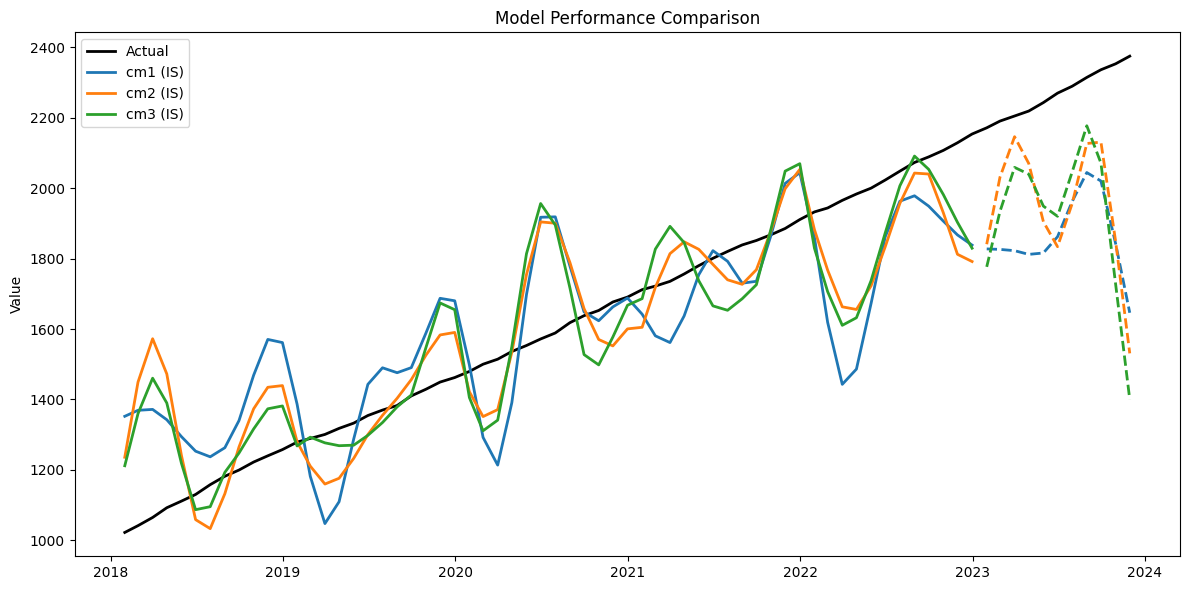


=== Model: cm1 — Parameters ===
  Variable          Coef        Pvalue            VIF           Std
0    const -80098.576975  1.070792e-07  109566.767013  13210.005301
1     NGDP    790.590825  6.693432e-08       1.000000    127.787280

=== Model: cm2 — Parameters ===
   Variable           Coef        Pvalue            VIF           Std
0     const -102431.583113  8.185794e-13  160112.183112  10548.208041
1      NGDP    1006.234207  5.067340e-13       1.462640    102.070687
2       M:2     191.626275  1.279396e-02       1.868931     74.035256
3       M:3     311.638847  1.284083e-02       1.922463    120.469578
4       M:4     249.002545  3.577665e-02       1.877174    115.195073
5       M:5      78.804183  3.956347e-01       1.833412     91.922362
6       M:6     -51.045918  5.545008e-01       1.856197     85.748698
7       M:7     -56.228406  4.875593e-01       1.865394     80.359956
8       M:8      10.005247  8.735138e-01       1.850707     62.506402
9       M:9      44.653402  4.

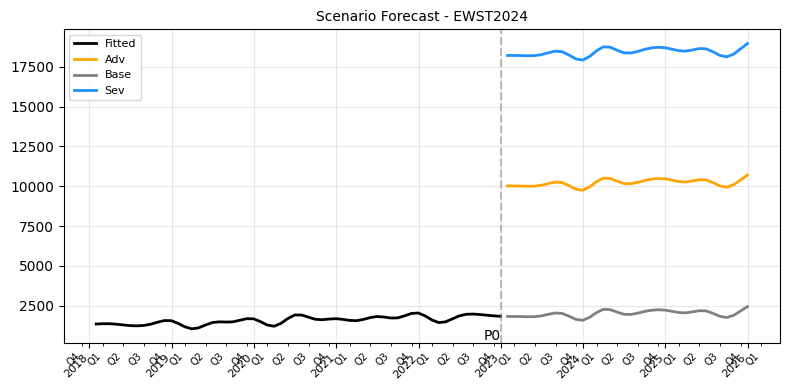

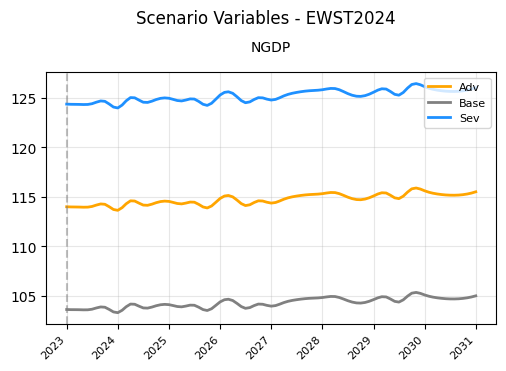

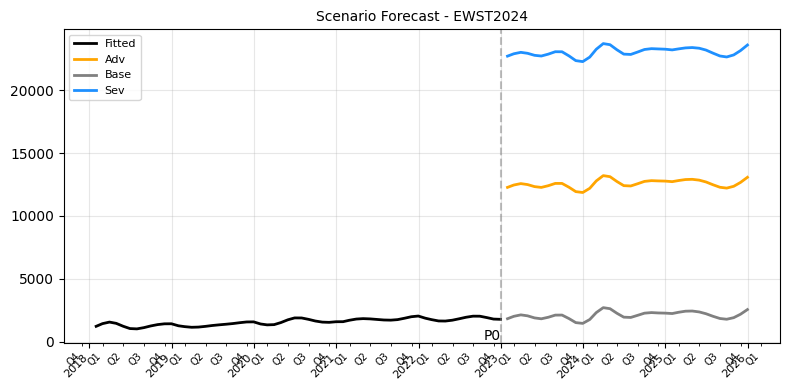

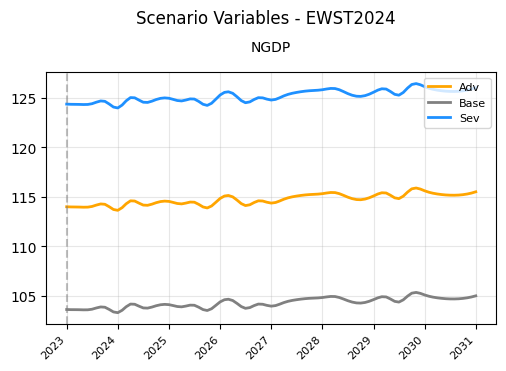

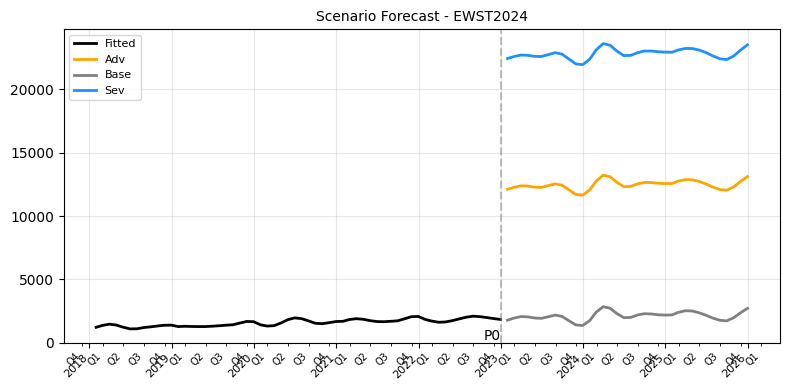

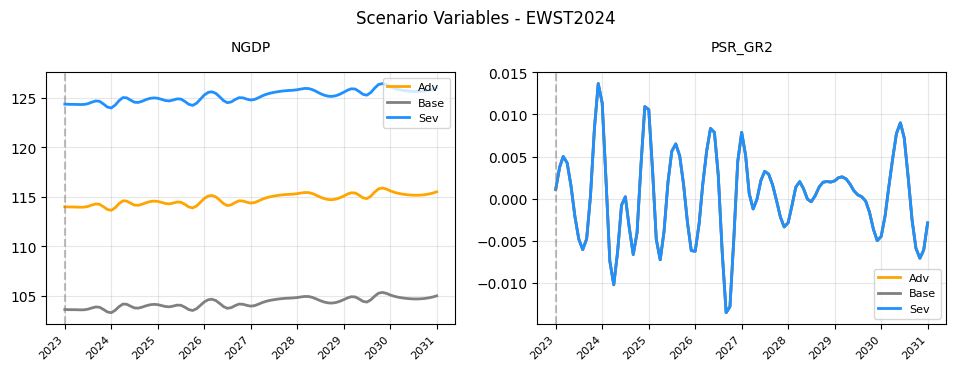

In [42]:
seg1.show_report(show_params=True, show_tests=True, show_scens=True)

In [43]:
vr_95 = seg1.dm.internal_data['VR_balance'].quantile(0.90)
vr_95

2218.766721015874

In [44]:
from Technic import CondVar, BO
#cm4 with CondVars
mth_var = [tc.DumVar('M', categories=[2,3,4,5,6,7])]
tsfm_var = [TSFM('PSR', GR2)]
cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

indep_vars = [mth_var, 'NGDP', tsfm_var, cond_var]
seg1.build_cm('cm4', indep_vars)

OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2+VR_price_BO

In [45]:
(seg1.cms['cm4'].model_full.y > vr_95).loc[lambda x: x==1]

Date
2023-05-31    True
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, Name: VR_balance, dtype: bool

In [46]:
tf = (seg1.cms['cm4'].model_full.X.VR_price_BO - seg1.dm.internal_data.VR_price) != 0
tf.loc[lambda x: x==1]

Date
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, dtype: bool

In [47]:
cm = seg1.cms['cm4']
cm.model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Common Driver Significance',
  "Group Driver F-Test M:2'3'4'5'6'7",
  'Residual Stationarity'])

In [48]:
cm.model_in.testset.print_test_info()

Active Tests:
- In-Sample R² | category: fit | filter_mode: moderate | desc: Require R² ≥ 0.4.
- Common Driver Significance | category: performance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Group Driver F-Test M:2'3'4'5'6'7 | category: performance | filter_mode: moderate | desc: F-test p < 0.1 for group <built-in function vars>.
- Multicollinearity | category: base | filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity | category: assumption | filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Residual Normality | category: assumption | filter_mode: moderate | desc: At least half of normality tests must pass.
- Y–X Cointegration | category: assumption | filter_mode: moderate | desc: Require Engle–Granger p-value < 0.10

Inactive Tests:
- Fit Measures
- IS Error Measures
- OOS Error Measures
- Residual Autocorrelation
- Residual Heteroscedasticity
- Y Stationarity

Note: These tests are included but not tur

### Test

In [49]:
seg1.cms['cm4'].model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Common Driver Significance',
  "Group Driver F-Test M:2'3'4'5'6'7",
  'Residual Stationarity'])

## Search

In [50]:
mdlsrch_config = {
    'dm': dm,
    'target': 'VR_balance',
    'model_cls': tc.OLS
}

srch = tc.ModelSearch(**mdlsrch_config)

In [51]:
dm.model_mev.head()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal,M,Q
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,NaN,NaN,3,1
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059,NaN,NaN,4,2
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845,NaN,NaN,5,2
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000,NaN,NaN,6,2
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583,NaN,NaN,7,3


In [52]:
forced_in = [tc.DumVar('M', categories=[2,3,4])]
desired_pool = [('PDI', 'PSR'), ['NGDP', tc.DumVar('M', categories=[2,3,4])], {'UNRATE', 'CPI', 'VR_price',}]

srch.build_spec_combos(forced_in=None, desired_pool=desired_pool, max_var_num=4, max_lag=2, max_periods=2)
srch.all_specs

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


[[('PDI', 'PSR')],
 [['NGDP', DumVar:M:2'3'4]],
 [TSFM:CPI_LV],
 [TSFM:CPI_LV_L1],
 [TSFM:CPI_LV_L2],
 [TSFM:CPI_DF],
 [TSFM:CPI_DF_L1],
 [TSFM:CPI_DF_L2],
 [TSFM:CPI_DF2],
 [TSFM:CPI_DF2_L1],
 [TSFM:CPI_DF2_L2],
 [TSFM:CPI_GR],
 [TSFM:CPI_GR_L1],
 [TSFM:CPI_GR_L2],
 [TSFM:CPI_GR2],
 [TSFM:CPI_GR2_L1],
 [TSFM:CPI_GR2_L2],
 [TSFM:UNRATE_LV],
 [TSFM:UNRATE_LV_L1],
 [TSFM:UNRATE_LV_L2],
 [TSFM:UNRATE_DF],
 [TSFM:UNRATE_DF_L1],
 [TSFM:UNRATE_DF_L2],
 [TSFM:UNRATE_DF2],
 [TSFM:UNRATE_DF2_L1],
 [TSFM:UNRATE_DF2_L2],
 [TSFM:UNRATE_GR],
 [TSFM:UNRATE_GR_L1],
 [TSFM:UNRATE_GR_L2],
 [TSFM:UNRATE_GR2],
 [TSFM:UNRATE_GR2_L1],
 [TSFM:UNRATE_GR2_L2],
 ['VR_price'],
 [('PDI', 'PSR'), ['NGDP', DumVar:M:2'3'4]],
 [('PDI', 'PSR'), TSFM:CPI_LV],
 [('PDI', 'PSR'), TSFM:CPI_LV_L1],
 [('PDI', 'PSR'), TSFM:CPI_LV_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF],
 [('PDI', 'PSR'), TSFM:CPI_DF_L1],
 [('PDI', 'PSR'), TSFM:CPI_DF_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF2],
 [('PDI', 'PSR'), TSFM:CPI_DF2_L1],
 [('PDI', 'PSR'), TSFM

In [53]:
passed_cms, failed_info, error_log = srch.filter_specs()

Filtering Specs: 100%|██████████| 127/127 [00:10<00:00, 11.94it/s, estimated_finish=2025-06-15 17:08:31]


In [54]:
error_log

[]

In [55]:
failed_info

[([('PDI', 'PSR')], ['In-Sample R²']),
 ([['NGDP', DumVar:M:2'3'4]], ['Residual Stationarity']),
 ([TSFM:CPI_LV], ['In-Sample R²']),
 ([TSFM:CPI_LV_L1], ['In-Sample R²']),
 ([TSFM:CPI_LV_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF], ['In-Sample R²']),
 ([TSFM:CPI_DF_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF2], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR], ['In-Sample R²']),
 ([TSFM:CPI_GR_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR2], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_LV], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2_L1], ['In-Sample R²'])

In [56]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

passed_cms, failed_info, error_log = srch.filter_specs(test_update_func=test_update_func)

Filtering Specs: 100%|██████████| 127/127 [00:09<00:00, 13.13it/s, estimated_finish=2025-06-15 17:08:41]


In [57]:
passed_cms

[OLS:VR_balance~C+NGDP+M:2+M:3+M:4,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_LV_L2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_GR]

In [58]:
error_log

[]

In [59]:
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))


def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

seg1.cms['cm3'].model_in.load_testset(test_update_func=test_update_func)
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))

(False, ["Group Driver F-Test M:2'3'4'5'6'7", 'Residual Stationarity'])
(False, ["Group Driver F-Test M:2'3'4'5'6'7"])


In [60]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False},
    'In-Sample R²': {'thresholds':{'strict': 0.8, 'moderate': 0.7}}
    }

    return update_map


forced_in = []
desired_pool = [['PDI', 'PSR'], 'NGDP', {'UNRATE', 'CPI'}, 'VR_price', tc.DumVar('M', categories=[2,3,4])]
seg1.search_cms(desired_pool=desired_pool, forced_in=forced_in, test_update_func=test_update_func, outlier_idx=["2018-04-30", "2018-05-31"])

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


=== ModelSearch Configuration ===
Target          : VR_balance
Model class     : OLS
Desired pool    : [['PDI', 'PSR'], 'NGDP', {'CPI', 'UNRATE'}, 'VR_price', DumVar:M:2'3'4]
Forced in       : []
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: <function test_update_func at 0x000001DC47D4F3A0>

Built 7751 spec combinations.

--- Example TestSet Info ---
Active Tests:
- In-Sample R² | category: fit | filter_mode: moderate | desc: Require R² ≥ 0.7.
- Common Driver Significance | category: performance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | category: base | filter_mode: moderate | desc: Threshold = 10
- Residual Normality | category: assumption | filter_mode: moderate | desc: At least half of normality tests must pass.
- Y–X Cointegration | category: assumption | filter_mode: moderate | desc: Require Engle–Granger p-value < 0.10

Ina

Filtering Specs:   0%|          | 8/7751 [00:00<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

KeyboardInterrupt: 

Filtering Specs:   0%|          | 9/7751 [00:20<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

In [63]:
seg1.searcher.analyze_failures()


=== Failed Spec Combinations Analysis ===
Total failed spec combos: 7742

1) Failure counts by test:
                 Test Name  Failure Count
              In-Sample R²           6749
Common Driver Significance            955
         Y–X Cointegration             35
        Residual Normality              3


2) Top 5 most frequent failed tests and their common spec elements:

  Test: In-Sample R²
    Number of combos that failed this test: 6749
    Top 3 spec elements contributing to this failure:
      • VR_price  (appeared in 3375 combos)
      • DumVar:M:2'3'4  (appeared in 3330 combos)
      • ['PDI', 'PSR']  (appeared in 2964 combos)

  Test: Common Driver Significance
    Number of combos that failed this test: 955
    Top 3 spec elements contributing to this failure:
      • ['PDI', 'PSR']  (appeared in 902 combos)
      • VR_price  (appeared in 500 combos)
      • DumVar:M:2'3'4  (appeared in 499 combos)

  Test: Y–X Cointegration
    Number of combos that failed this test:

=== Candidate Models to Report ===
- cm1: OLS:VR_balance~C+NGDP
- cm2: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2
- cm4: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2+VR_price_BO
- cm1_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV_L1+UNRATE_LV_L2+M:2+M:3+M:4
- cm2_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV+M:2+M:3+M:4
- cm3_2: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L3+M:2+M:3+M:4
- cm4_2: OLS:VR_balance~C+NGDP_LV+UNRATE_DF2_L3+M:2+M:3+M:4
- cm5: OLS:VR_balance~C+NGDP_LV+UNRATE_GR_L3+M:2+M:3+M:4
- cm6: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L3+M:2+M:3+M:4
- cm7: OLS:VR_balance~C+NGDP_LV+UNRATE_GR3_L2+M:2+M:3+M:4
- cm8: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L2+M:2+M:3+M:4
- cm9: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L2+M:2+M:3+M:4


=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.585757  0.578615  522.291195

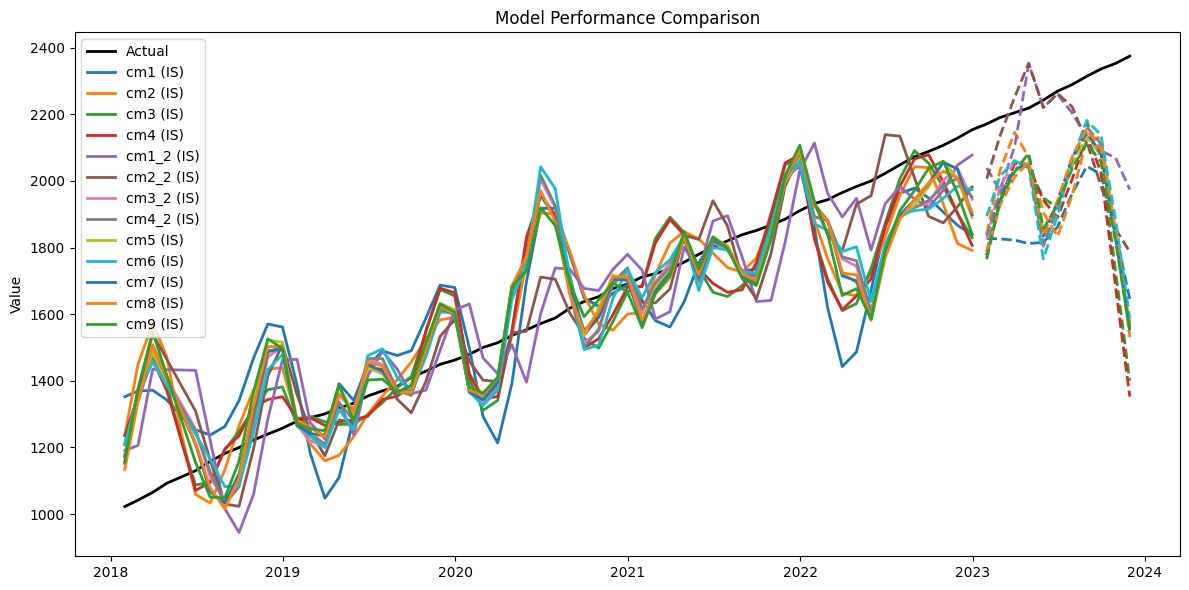


=== Model: cm1 — Testing Metrics ===

--- Fit Measures ---
R²        0.585757
Adj R²    0.578615

--- IS Error Measures ---
ME      522.291195
MAE     169.955421
RMSE    207.529157

--- OOS Error Measures ---
ME      728.482837
MAE     407.558730
RMSE    424.405214

--- In-Sample R² ---
R²    0.585757

--- Common Driver Significance ---
           P-value  Passed
NGDP  6.693432e-08    True

--- Multicollinearity ---
          VIF
Variable     
NGDP      1.0

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF    -0.595801  0.871928   False
PP     -1.757428  0.401793   False
KPSS    0.842360  0.010000   False
ZA           NaN       NaN   False
DFGLS   0.953764  0.918276   False
RUR     1.678293  0.900000    True

--- Residual Normality ---
      Statistic   P-value  Passed
Test                             
JB     1.181627  0.553877    True
SW     0.975336  0.263710    True
KS     0.080475  0.802298    True
CM     0.031041  0.973589   

In [64]:
seg1.show_report(show_tests=True)

In [65]:
seg1.searcher.top_cms[0].testset_in.tests[3].thresholds

{'strict': 0.8, 'moderate': 0.7}

### Scenario

In [66]:
# # Create a Scenario object
# mth_var = [f'M{i}' for i in range(2,5)]
# tsfm_var = [TSFM('PSR', 'GR2')]
# cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

# scen_config = {
#     'dm': dm,
#     'model': cm.model_in,
#     'specs': [mth_var, 'NGDP', tsfm_var, cond_var],
#     'P0': '2023-08-31'
# }
# scen = tc.Scenario(**scen_config)
# y_scens = scen.y_scens

In [67]:
# y_scens['fake_scens']['base'].dropna()

In [68]:
# y_scens['fake_scens']['adv'].dropna()